# DNN 시작

## 라이브러리 로딩하기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

## 데이터 불러오기

In [3]:
NUM_CLASS = 10

In [13]:
# keras에서 제공하는 cifar10 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
# 이미지 데이터 정규화
# keras 모델을 돌릴때 이미지 픽셀값이 -1 ~ 1 사이에 있어야지 성능이 좋음
# y 데이터는 to_catagorical 함수를 이용하여 one-hot 인코딩 시켜줌
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASS)
y_test = to_categorical(y_test, NUM_CLASS)

# 모델 구성하기

In [17]:
# keras에서 제공하는 Sequential 모델을 활용하여 모델 구성해보기
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Dense(200, activation = 'relu', input_shape = (32,32,3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


하지만 이 방식을 사용하게 되면, input layer를 여러가지로 구성할 수 없거나, 유연성이 없는 모델이 될 가능성이 높습니다.  
따라서 함수형 API를 사용하여 모델 네트워크를 구성하는 방법이 더 권장되는 것으로 알려져 있습니다.  
이제 저는 공부를 진행할 때, 함수형 API를 이용하여 모델을 구성해보도록 하겠습니다.

In [20]:
input_layer = Input((32,32,3))

layer_1 = Flatten()(input_layer)

layer_2 = Dense(200, activation = 'relu')(layer_1)
layer_3 = Dense(150, activation = 'relu')(layer_2)

output_layer = Dense(NUM_CLASS, activation = 'softmax')(layer_3)

model = Model(input_layer, output_layer)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [36]:
optimizer = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## 모델 훈련

In [24]:
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 31s 616us/step - loss: 1.8413 - acc: 0.3362
Epoch 2/10
50000/50000 [==============================] - 29s 587us/step - loss: 1.6615 - acc: 0.4045
Epoch 3/10
50000/50000 [==============================] - 29s 583us/step - loss: 1.5832 - acc: 0.4365
Epoch 4/10
50000/50000 [==============================] - 30s 590us/step - loss: 1.5321 - acc: 0.4567
Epoch 5/10
50000/50000 [==============================] - 30s 593us/step - loss: 1.4918 - acc: 0.4713
Epoch 6/10
50000/50000 [==============================] - 29s 580us/step - loss: 1.4602 - acc: 0.4812
Epoch 7/10
50000/50000 [==============================] - 29s 578us/step - loss: 1.4351 - acc: 0.4898
Epoch 8/10
50000/50000 [==============================] - 29s 582us/step - loss: 1.4130 - acc: 0.4987
Epoch 9/10
50000/50000 [==============================] - 29s 587us/step - loss: 1.3909 - acc: 0.5068
Epoch 10/10
50000/50000 [=========

## 모델 평가

In [25]:
# 결과는 [loss, accuracy] 값으로 반환 됨
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/step


[1.428921551513672, 0.4962]

In [26]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

pred = model.predict(x_test)
pred_single = CLASSES[np.argmax(pred, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [27]:
pred_single

array(['cat', 'ship', 'ship', ..., 'cat', 'deer', 'horse'], dtype='<U10')

In [28]:
actual_single

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [29]:
show_n = 10
indices = np.random.choice(range(len(x_test)),show_n)

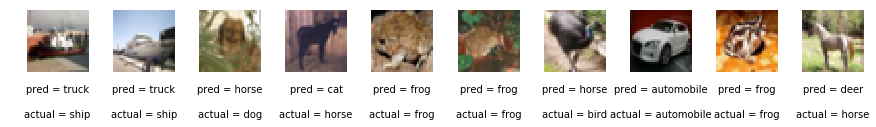

In [35]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, show_n, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(pred_single[idx]), fontsize=10, ha ='center', transform = ax.transAxes)
    ax.text(0.5, -0.75, 'actual = ' + str(actual_single[idx]), fontsize=10, ha ='center', transform = ax.transAxes)
    ax.imshow(img)

# CNN 시작